# PARTICLE PHYSICS EVENT CLASSIFICATION

## Problem Statement
In the field of particle physics, accurate identification and classification of events are crucial for understanding fundamental particles and their interactions.

The provided dataset contains various features derived from particle physics experiments, and the goal is to build a machine-learning model to classify events into signal (s) and background (b) categories. This classification aids in distinguishing events of interest (signal) from background noise

## Objective
The primary goal of this machine learning project is to develop a model that can accurately predict whether a given set of experimental features corresponds to a signal or background event.

Successful classification contributes to the advancement of particle physics research by automating the identification of events that may indicate the presence of specific particles or phenomena.


### Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Ignore Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading and Reading Data in Pandas DataFrame

In [3]:
#loading Data
data = pd.read_csv('Data.csv')
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [4]:
# Making Local Copy of data
df=data.copy()
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


### Number rows and Columns in Dataset

In [5]:
r,c=df.shape
print(f'Dataset Has {r} rows and {c} columns')

Dataset Has 250000 rows and 33 columns


### Characterstics of the features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

#### There are 32 Numerical features and 1 categorical feature wich is our target column

### Checking for null Values in the columns

In [7]:
df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

#### There are no Missing values in dataset

## Anlysing the Target variable Before the Data Cleaning

### Count of the various categories in the target varaible

In [8]:
df['Label'].value_counts()
print(f"There are {df['Label'].value_counts()['b']} counts for 'b' category")
print(f"There are {df['Label'].value_counts()['s']} counts for 's' category")

There are 164333 counts for 'b' category
There are 85667 counts for 's' category


### Visualisation of Target Variable 

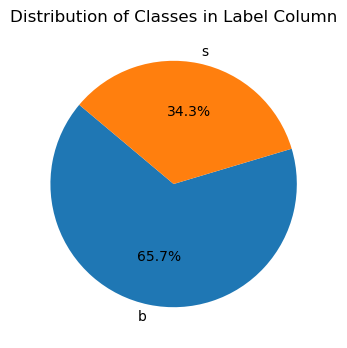

In [9]:
value_counts = df['Label'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes in Label Column')
plt.show()

#### The dataset Has 65.7% of 'b' Class and 34.3% of 's' Class we can say that a dataset is Moderately imbalanced

In [10]:
# Looking For Duplicates in the dataset
row, column = df[df.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EventId,250000.0,224999.500000,72168.927986,100000.000000,162499.750000,224999.500000,287499.250000,349999.000000
DER_mass_MMC,250000.0,-49.023079,406.345647,-999.000000,78.100750,105.012000,130.606250,1192.026000
DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000000,19.241000,46.524000,73.598000,690.075000
DER_mass_vis,250000.0,81.181982,40.828691,6.329000,59.388750,73.752000,92.259000,1349.351000
DER_pt_h,250000.0,57.895962,63.655682,0.000000,14.068750,38.467500,79.169000,2834.999000
DER_deltaeta_jet_jet,250000.0,-708.416643,454.482458,-999.000000,-999.000000,-999.000000,0.490000,9.000000
DER_mass_jet_jet,250000.0,-601.237051,657.972302,-999.000000,-999.000000,-999.000000,83.446000,4974.979000
DER_prodeta_jet_jet,250000.0,-709.356603,453.019877,-999.000000,-999.000000,-999.000000,-4.593000,16.690000
DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208000,1.810000,2.491500,2.961000,5.684000
DER_pt_tot,250000.0,18.917332,22.273494,0.000000,2.841000,12.315500,27.591000,2834.999000


## Analysing the Input Features 

In [12]:
# Separating the input features and target Column
df_X=df.drop(['Label'],axis=1)
df_X.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333


#### When We observe the Features There is a value -999 in most of the Columns wich is disctinct From other Values in the respective columns. This might be 
#### 1. Undefined or Missing Data
-999 could be used to represent undefined or missing data in certain measurements or variables.This is common in experimental data where certain readings or measurements may not be available.
#### 2. Error Code 
It might serve as an error code, indicating that there was an issue or anomaly in the data collection process.
#### 3.Detector or Instrument Malfunction
-999 might be assigned when there's a malfunction in the particle detector or experimental instrument. It could be a way to mark data points that are affected by technical issues.

                -In particle physics experiments, the value -999 is often used as a placeholder or a convention to represent missing or undefined data. It's not a physical measurement but rather a code to indicate that a particular parameter or measurement could not be determined or was not recorded for a given event. Therefore we can treate -999 as a null value

In [13]:
percentage_minus_999_per_column = (df_X.eq(-999).mean()) * 100

# Display the percentages
print("Percentage of -999 occurrences in each column:")
print(percentage_minus_999_per_column)

Percentage of -999 occurrences in each column:
EventId                         0.0000
DER_mass_MMC                   15.2456
DER_mass_transverse_met_lep     0.0000
DER_mass_vis                    0.0000
DER_pt_h                        0.0000
DER_deltaeta_jet_jet           70.9824
DER_mass_jet_jet               70.9828
DER_prodeta_jet_jet            70.9828
DER_deltar_tau_lep              0.0000
DER_pt_tot                      0.0000
DER_sum_pt                      0.0000
DER_pt_ratio_lep_tau            0.0000
DER_met_phi_centrality          0.0000
DER_lep_eta_centrality         70.9828
PRI_tau_pt                      0.0000
PRI_tau_eta                     0.0000
PRI_tau_phi                     0.0000
PRI_lep_pt                      0.0000
PRI_lep_eta                     0.0000
PRI_lep_phi                     0.0000
PRI_met                         0.0000
PRI_met_phi                     0.0000
PRI_met_sumet                   0.0000
PRI_jet_num                     0.0000
PRI_jet_leading_p

### Removing Columns with  >30% of -999 values

In [14]:
threshold = 0.3  # 30%

# Calculate the percentage of -999 values in each column
percent_of_minus_999 = df_X.eq(-999).mean()

# Filter columns where the percentage of -999 values is greater than the threshold
columns_to_drop = percent_of_minus_999[percent_of_minus_999 > threshold].index

# Drop the selected columns
df_X = df_X.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
df_X.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,0.002653
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,2.233584
2,100002,-999.000,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,...,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.347389
3,100003,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,...,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,0.000,5.446378
4,100004,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,...,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,6.245333


In [15]:
percentage_minus_999_per_column = (df_X.eq(-999).mean()) * 100

# Display the percentages
print("Percentage of -999 occurrences in each column:")
print(percentage_minus_999_per_column)

Percentage of -999 occurrences in each column:
EventId                         0.0000
DER_mass_MMC                   15.2456
DER_mass_transverse_met_lep     0.0000
DER_mass_vis                    0.0000
DER_pt_h                        0.0000
DER_deltar_tau_lep              0.0000
DER_pt_tot                      0.0000
DER_sum_pt                      0.0000
DER_pt_ratio_lep_tau            0.0000
DER_met_phi_centrality          0.0000
PRI_tau_pt                      0.0000
PRI_tau_eta                     0.0000
PRI_tau_phi                     0.0000
PRI_lep_pt                      0.0000
PRI_lep_eta                     0.0000
PRI_lep_phi                     0.0000
PRI_met                         0.0000
PRI_met_phi                     0.0000
PRI_met_sumet                   0.0000
PRI_jet_num                     0.0000
PRI_jet_all_pt                  0.0000
Weight                          0.0000
dtype: float64


#### Now we have 15.2456% of -999 values in 'DER_mass_MMC' column we can impute them with median value as this column Represents the calculated mass of a system using the missing energy in the experiment

In [16]:
# Replace -999 values with the median
median_value = df_X[df_X['DER_mass_MMC'] != -999]['DER_mass_MMC'].median()

df_X['DER_mass_MMC'] = df_X['DER_mass_MMC'].replace(-999, median_value)

percentage_minus_999_per_column = (df_X.eq(-999).mean()) * 100
# Display the percentages of -999 
print("Percentage of -999 occurrences in each column:")
print(percentage_minus_999_per_column)

Percentage of -999 occurrences in each column:
EventId                        0.0
DER_mass_MMC                   0.0
DER_mass_transverse_met_lep    0.0
DER_mass_vis                   0.0
DER_pt_h                       0.0
DER_deltar_tau_lep             0.0
DER_pt_tot                     0.0
DER_sum_pt                     0.0
DER_pt_ratio_lep_tau           0.0
DER_met_phi_centrality         0.0
PRI_tau_pt                     0.0
PRI_tau_eta                    0.0
PRI_tau_phi                    0.0
PRI_lep_pt                     0.0
PRI_lep_eta                    0.0
PRI_lep_phi                    0.0
PRI_met                        0.0
PRI_met_phi                    0.0
PRI_met_sumet                  0.0
PRI_jet_num                    0.0
PRI_jet_all_pt                 0.0
Weight                         0.0
dtype: float64


#### We have Succesfully Treated the -999 Values

### Anlysing the 'EventId' feature


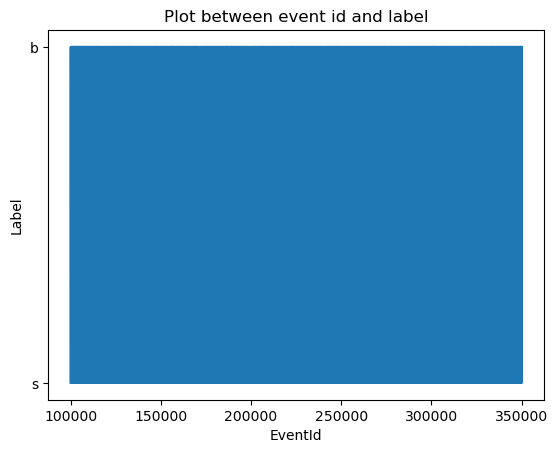

In [17]:
plt.figure()
plt.title("Plot between event id and label")
plt.xlabel('EventId')
plt.ylabel('Label')
#plt.ylim() -- here you define the range
plt.plot(df_X['EventId'], df['Label'])


#### This Represent the there is no reltionship between 'EventId' and 'Label' we can drop that column

In [18]:
# Droping the 'EventId' column
df_X=df_X.drop(['EventId'],axis=1)
df_X = df_X.reset_index(drop=True)
df_X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,0.002653
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,2.233584
2,112.406,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.347389
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,0.000,5.446378
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,6.245333


### Check for Zero Variance Colums
Zero Variance means there is no variability in the data within that column. This can happen when a column contains a constant value for all the rows, making it redundant for analysis as it does not provide any useful information for distinguishing between different rows.

In [19]:
zero_variance_cols = []
for col in df_X.columns:
    if df_X[col].nunique() == 1:
        zero_variance_cols.append(col)
print(zero_variance_cols)
print(f'There are {len(zero_variance_cols)} columns with Zero Variance')

[]
There are 0 columns with Zero Variance


#### There are no columns with zero variance in the dataset. This means that all columns have some variability in their values, which is good for analysis as they provide useful information for distinguishing between different rows

### Check for the correlation among the features
Correlation among the input Features introduce the multi colinearity wich would reduce the model stablity, redundunt information that can lead to overfitting

In [20]:
def find_and_plot_multicollinearity(df, threshold=0.8):
    
    #finding Correalation matrix
    corr_matrix = df.corr().abs()  # Calculate the correlation matrix
    cols = corr_matrix.columns
    
    # Find columns with correlation greater than or equal to the threshold
    multicollinear_features = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_features.add(cols[i])
                multicollinear_features.add(cols[j])

    # Plotting the correlation heatmap
    plt.figure(figsize=(15,12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    return multicollinear_features

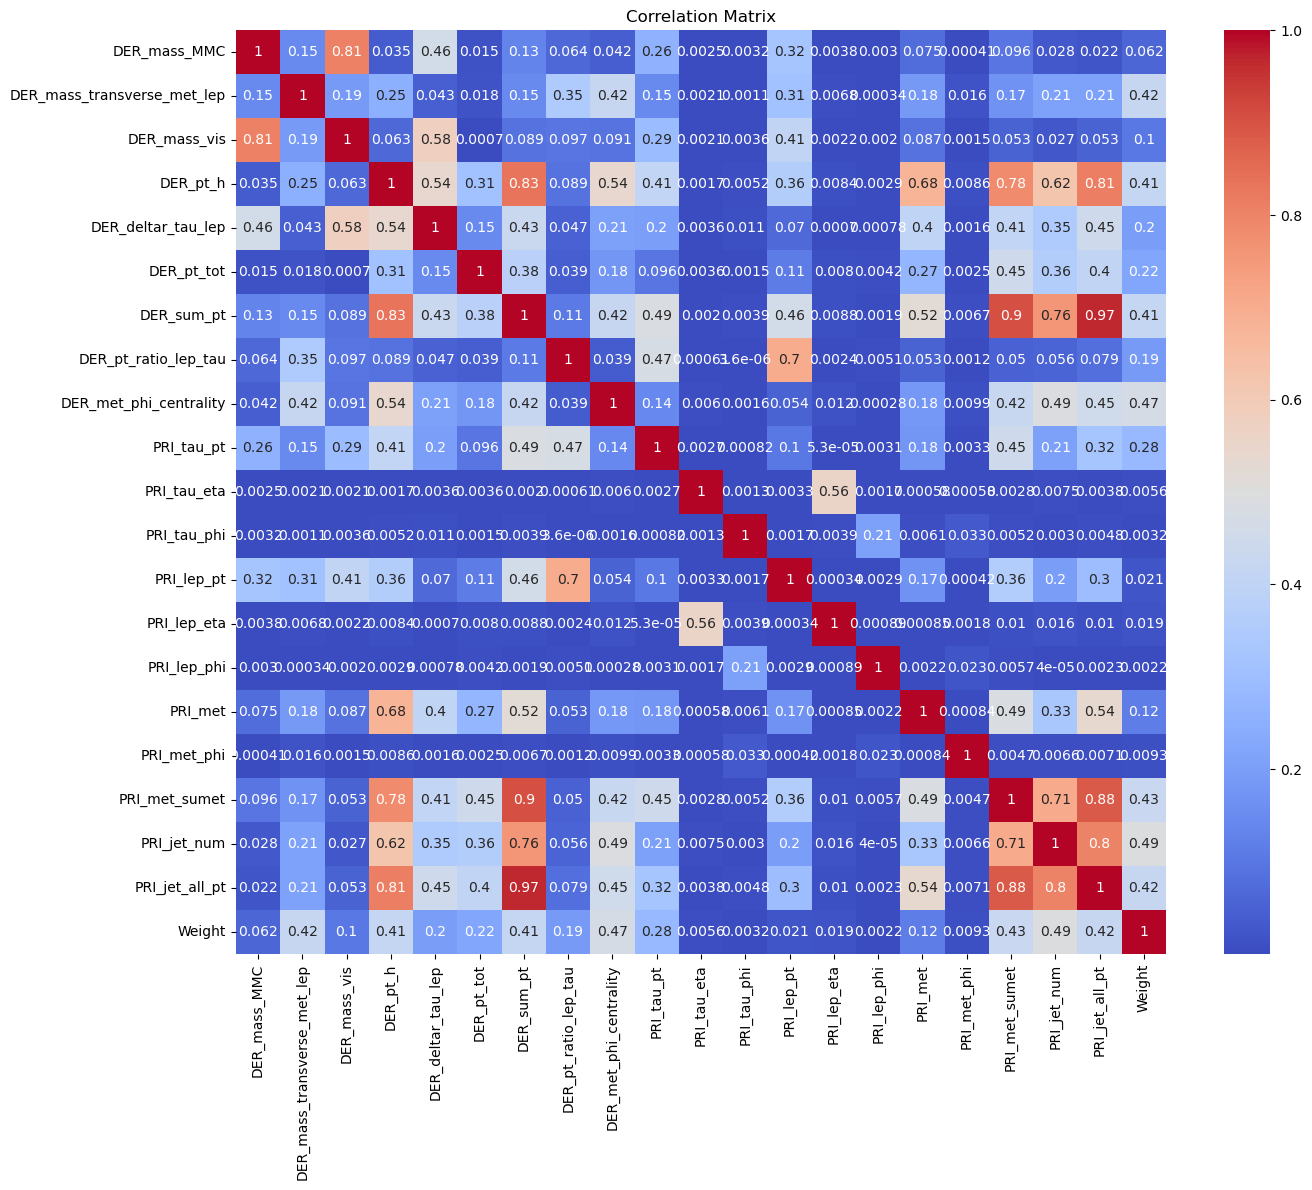

{'PRI_jet_num', 'DER_sum_pt', 'DER_mass_vis', 'DER_pt_h', 'PRI_jet_all_pt', 'PRI_met_sumet', 'DER_mass_MMC'}


In [21]:
multicollinear_columns = find_and_plot_multicollinearity(df_X)
print(multicollinear_columns)

In [22]:
#Remove  features with High multicolinearity
features_to_remove = list(multicollinear_columns)#converting set of multicolinear columns to list

# Drop identified features
df_X = df_X.drop(features_to_remove, axis=1)
df_X.shape

(250000, 14)

### Univariate Analysis of features

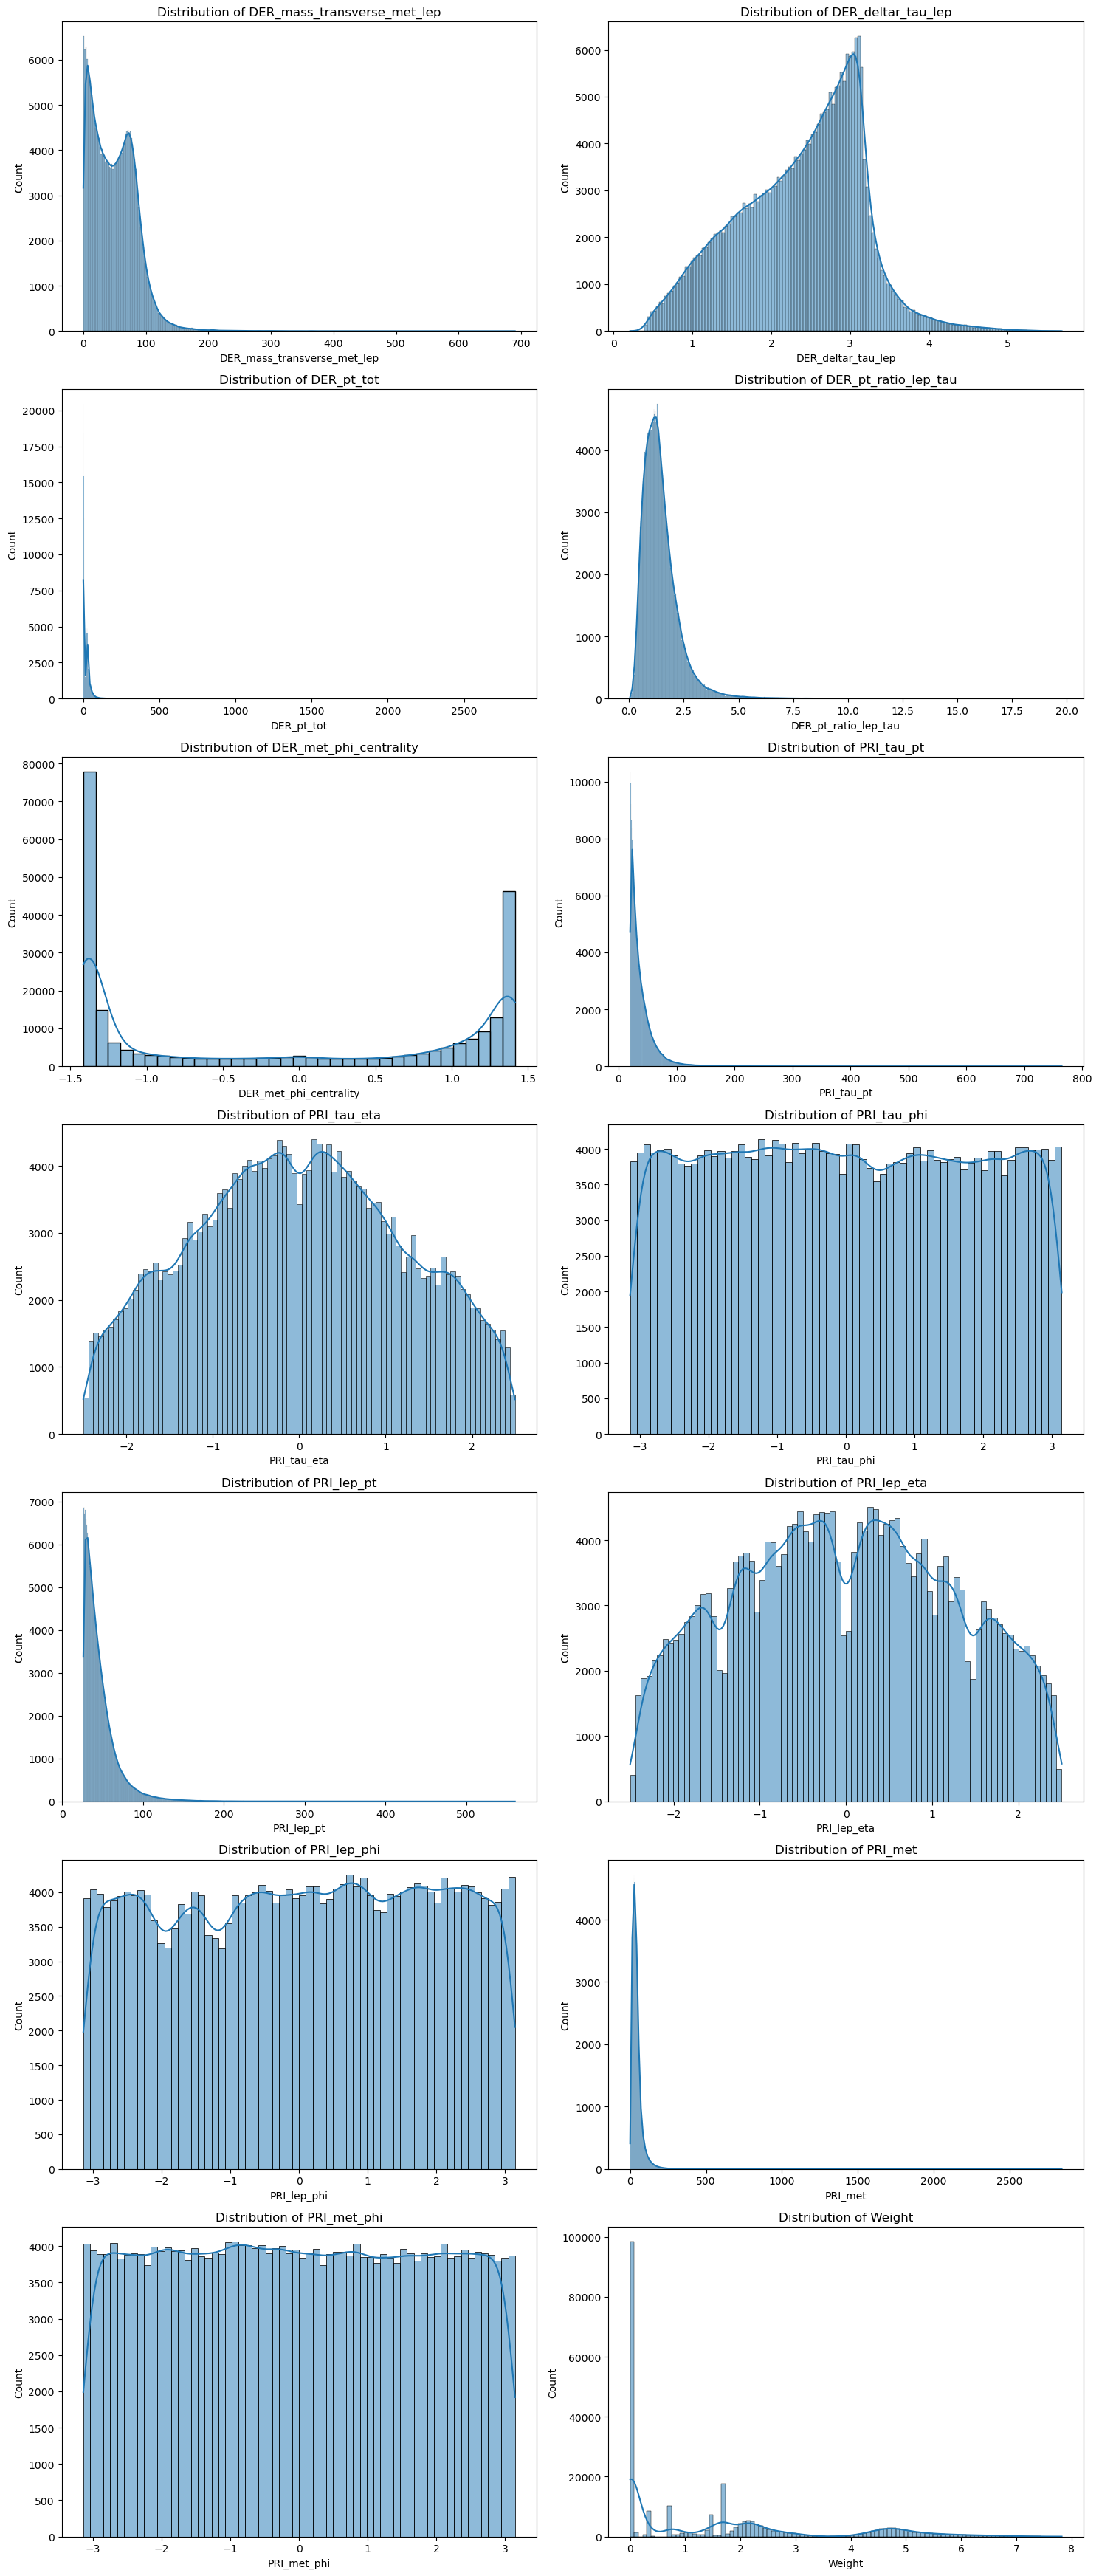

In [23]:
num_rows = 7
num_columns = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# Plot distribution plots
for i, column in enumerate(df_X.columns):
    row_idx = i // num_columns
    col_idx = i % num_columns

    sns.histplot(df_X[column], kde=True, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

#### Histograms plots of input features shows that some features with near normal distribution, some features skewed this is due to the presence of outliers in the data

### Outlier Detection using Boxplot

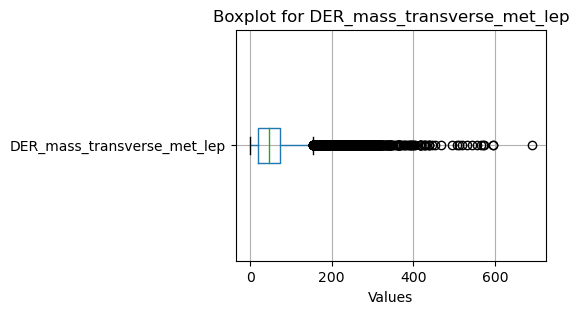

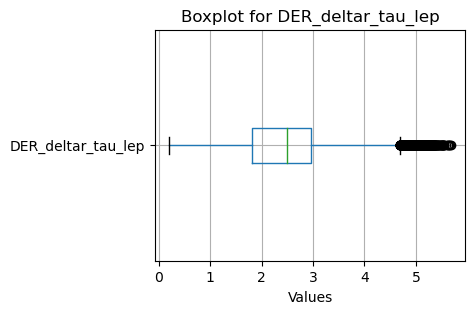

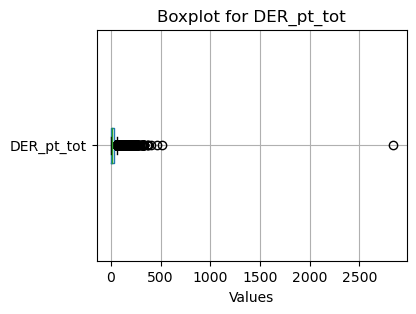

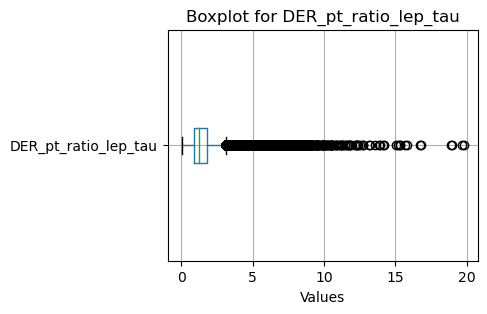

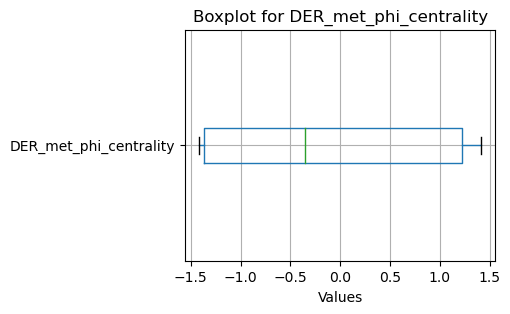

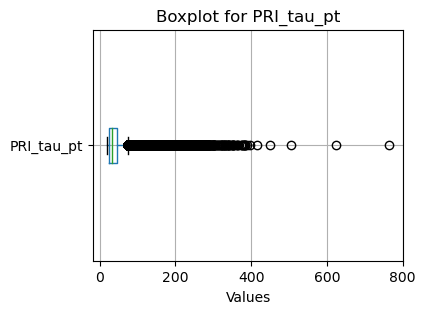

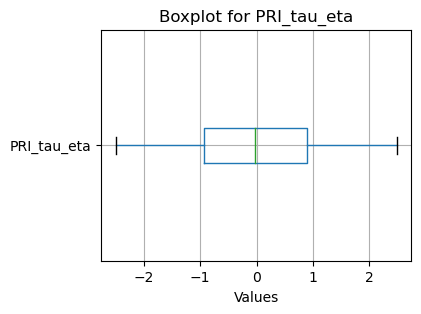

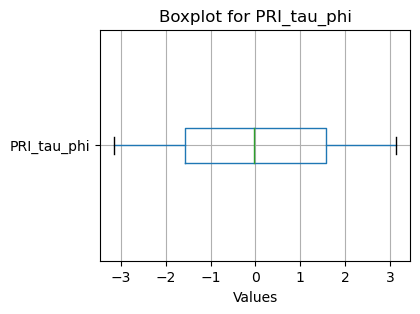

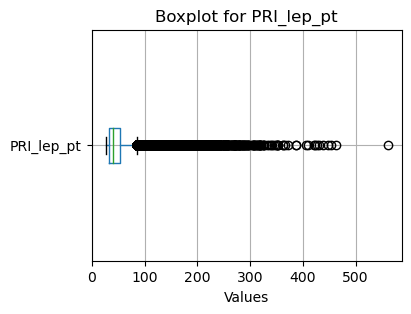

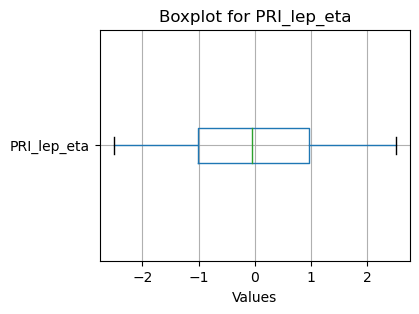

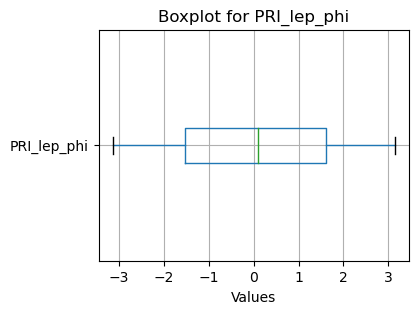

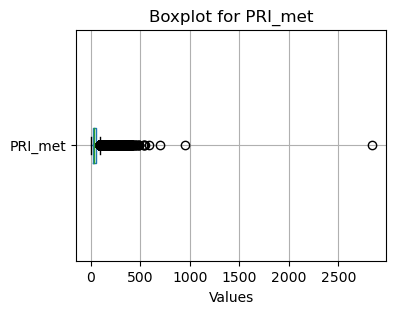

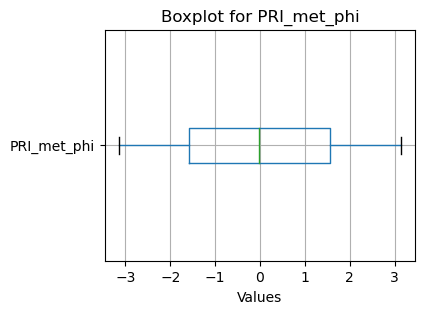

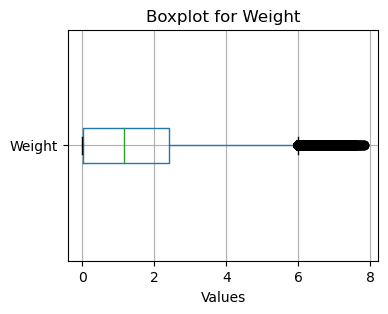

In [24]:
for column in df_X.columns:
    plt.figure(figsize=(4, 3))
    df.boxplot(column=[column], vert=False)
    plt.title(f'Boxplot for {column}')
    plt.xlabel('Values')
    plt.show()

### % of Outlier in each column 

In [25]:
# find % outliers in each numerical column

def percentage_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)
    percentage = (sum(outliers) / len(column)) * 100

    return percentage

# Calculate percentage of outliers for each column
percentage_outliers_per_column = df_X.apply(percentage_outliers)

# Display the result
print("Percentage of outliers in each column:")
print(percentage_outliers_per_column)

Percentage of outliers in each column:
DER_mass_transverse_met_lep    0.7400
DER_deltar_tau_lep             0.2576
DER_pt_tot                     3.4528
DER_pt_ratio_lep_tau           3.8264
DER_met_phi_centrality         0.0000
PRI_tau_pt                     5.5700
PRI_tau_eta                    0.0000
PRI_tau_phi                    0.0000
PRI_lep_pt                     5.3736
PRI_lep_eta                    0.0000
PRI_lep_phi                    0.0000
PRI_met                        5.3196
PRI_met_phi                    0.0000
Weight                         2.1808
dtype: float64


#### The Ouliers in each column are less than 6% they may be the true meassurements/readings lets keep them as it is

In [26]:
X=df_X.copy()
print(X.shape)
X.head()

(250000, 14)


,DER_mass_transverse_met_lep,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,Weight
0,51.655,3.064,41.928,1.582,1.396,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,0.002653
1,68.768,3.473,2.078,0.879,1.414,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,2.233584
2,162.172,3.148,9.336,3.776,1.414,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,2.347389
3,81.417,3.310,0.414,2.354,-1.285,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,5.446378
4,16.915,3.891,16.405,1.056,-1.385,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,6.245333


### Encoding the Target Feature 

In [27]:
#Label Encoding the Target variable Using Label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df['Label'])
y


array([1, 0, 0, ..., 1, 0, 0])

In [28]:
df_X.head()

,DER_mass_transverse_met_lep,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,Weight
0,51.655,3.064,41.928,1.582,1.396,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,0.002653
1,68.768,3.473,2.078,0.879,1.414,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,2.233584
2,162.172,3.148,9.336,3.776,1.414,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,2.347389
3,81.417,3.310,0.414,2.354,-1.285,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,5.446378
4,16.915,3.891,16.405,1.056,-1.385,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,6.245333


## Splitting the data into Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,DER_mass_transverse_met_lep,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,Weight
75381,15.157,1.308,7.354,1.018,1.185,64.885,0.422,1.026,66.038,-0.211,2.170,114.450,1.995,0.001503
65569,51.081,2.032,2.333,1.434,1.128,27.472,-1.550,-2.406,39.383,-1.901,-0.404,25.632,-2.272,1.454848
163473,52.062,2.024,17.196,0.565,0.111,49.299,1.770,1.265,27.872,1.797,-0.759,26.706,1.775,0.819817
90518,24.055,2.031,28.394,1.096,1.362,41.929,0.489,2.347,45.969,1.619,0.659,44.124,1.200,0.001503
138866,82.314,3.162,48.574,2.094,1.373,23.349,1.653,2.770,48.881,-1.102,1.218,147.319,2.231,1.475203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,43.399,3.190,24.427,1.205,1.411,21.645,0.771,0.655,26.083,1.927,-2.318,23.271,-0.163,1.454848
103694,56.801,2.725,24.583,0.619,1.337,61.730,-1.162,-1.377,38.235,-1.563,2.211,24.912,-1.735,0.018636
131932,52.010,2.485,3.121,1.259,-0.920,21.967,-0.397,1.482,27.654,1.670,0.102,43.915,-1.583,1.233540
146867,51.456,1.932,19.871,1.329,-1.408,28.634,0.268,-2.535,38.044,0.809,1.893,23.276,-0.196,4.556284


### Scaling the Input features using Robust Scaler
We use Robust Scaler as the data contains outliers.

In [30]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
print(X_train_scaled)
print(X_test_scaled)

[[-0.5769827  -1.03043478 -0.20416814 ...  2.61229911  0.64623244
  -0.47711291]
 [ 0.08401374 -0.40086957 -0.40686279 ... -0.30072155 -0.71615581
   0.13217152]
 [ 0.102064   -0.40782609  0.1931473  ... -0.26549688  0.57598978
  -0.13405218]
 ...
 [ 0.10110721 -0.00695652 -0.37505172 ...  0.29891768 -0.49616858
   0.0393927 ]
 [ 0.09091369 -0.48782609  0.30113539 ... -0.37799278 -0.05332056
   1.4323827 ]
 [ 0.67825551  0.2373913  -0.47985063 ... -0.03768449 -0.3467433
   1.69478418]]
[[-0.26446114  0.13652174  0.46830499 ...  0.19137422  0.53767561
   1.44474825]
 [ 0.50511286  0.59826087 -0.4222839  ... -0.24670384 -0.69284802
   1.62089055]
 [ 0.56610838  0.27391304 -0.44460816 ... -0.22604133 -0.16698595
   1.51257091]
 ...
 [ 0.46562677  0.68956522 -0.26524701 ...  0.16566087 -0.08876117
   2.31714067]
 [ 0.12022466  0.14       -0.31369027 ... -0.40259101  0.61909323
   1.51517875]
 [ 0.68681144  0.53826087 -0.44343745 ...  0.28242047 -0.67049808
   0.35245134]]


# Training the Model with Variour Algorithms

# Logistic Regression 

In [32]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

# Training model
LR.fit(X_train_scaled,y_train)

# Predicting
y_pred_train = LR.predict(X_train_scaled)
y_pred_test = LR.predict(X_test_scaled)


### Evaluating the Logistic Regression Model

In [33]:
# with accuracy Score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

LR_train_accu = accuracy_score(y_train,y_pred_train)

LR_test_accu =  accuracy_score(y_test,y_pred_test)

print("Logistic Regression Training Data Accuracy : ",LR_train_accu )
print("Logistic Regression Testing Data Accuracy : ",LR_test_accu )

Logistic Regression Training Data Accuracy :  0.98792
Logistic Regression Testing Data Accuracy :  0.98768


#### While the Accuracy is important metrics but it is essential to consider other metrces like Confusion matrix, Precision, Recall, F1-score as our data is moderately imbalanced 

### Confusion Matrix for LR model


In [34]:
print("Confusion Matrix for Training Data : ")
print(confusion_matrix(y_train,y_pred_train))
print()
print("Confusion Matrix for Testing Data : ")
print(confusion_matrix(y_test,y_pred_test))

Confusion Matrix for Training Data : 
[[128921   2347]
 [    69  68663]]

Confusion Matrix for Testing Data : 
[[32465   600]
 [   16 16919]]


####  Based on the confusion matrices, the logistic regression model appears to be performing well. However, let us consider additional evaluation methods for a more comprehensive analysis. There are total of 2416(1.24%) missclassifications with training data and 616(1.23%) missclassifications with testing data

### Classification Report for LR model

In [35]:
print("Classifiction report of Train data for LR:")
print(classification_report(y_train,y_pred_train))
print()
print("Classifiction report of test data for LR:")
print(classification_report(y_test,y_pred_test))

Classifiction report of Train data for LR:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    131268
           1       0.97      1.00      0.98     68732

    accuracy                           0.99    200000
   macro avg       0.98      0.99      0.99    200000
weighted avg       0.99      0.99      0.99    200000


Classifiction report of test data for LR:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     33065
           1       0.97      1.00      0.98     16935

    accuracy                           0.99     50000
   macro avg       0.98      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



#### Based on the  classification reports, the logistic regression model appears to be performing well on both the training and testing data. The high precision, recall, and F1-score, coupled with the high accuracy, suggest that the model is effective for the given Particle physics experiment

## Cross Validation Technique for LR Model

In [36]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Training_scores = cross_val_score(LR, X_train_scaled,y_train, cv=kfold, scoring='f1')
Testing_scores = cross_val_score(LR, X_test_scaled,y_test, cv=kfold, scoring='f1')

LR_CV_mean_F1_train = Training_scores.mean()
print("Train Mean F1-Score : ",LR_CV_mean_F1_train)

LR_CV_mean_accu_test = Testing_scores.mean()
print("Test Mean F1-Score : ",LR_CV_mean_accu_test)

Train Mean F1-Score :  0.9785237784617058
Test Mean F1-Score :  0.950947679927159


#### The high mean F1-scores for both training and testing data suggest that our logistic regression model performs well in terms of precision and recall, and it generalizes effectively to new/unseen data.

## ROC AUC Curve for Logistic Regression

ROC Area under the curve is:  0.9994822305386527


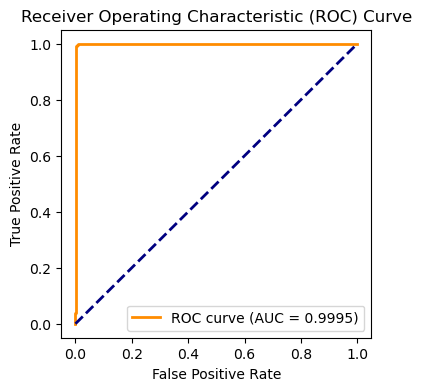

In [37]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob = LR.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC Area under the curve is: ",roc_auc)
# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### With an AUC-ROC of 0.9995, our logistic regression model seems to be performing well. It indicates that the model has a nearly perfect ability to discriminate between positive and negative instances.

In [38]:
#Testing the model on unseen data
X_test.head()

,DER_mass_transverse_met_lep,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,Weight
38683,32.142,2.650,24.012,0.499,-0.976,54.044,-0.030,-1.466,26.969,-1.637,0.641,40.636,1.655,4.585780
64939,73.967,3.181,1.951,2.106,1.064,23.812,1.477,-2.197,50.156,0.805,0.977,27.279,-2.199,5.005938
3954,77.282,2.808,1.398,1.752,-1.354,31.613,0.032,-1.295,55.381,0.498,2.219,27.909,-0.552,4.747560
120374,37.713,2.062,2.179,0.670,1.380,55.592,-1.102,-1.189,37.219,-1.132,0.873,23.319,-0.516,0.018636
172861,82.024,1.943,15.350,1.461,-1.414,25.509,-1.108,2.158,37.278,-0.121,-2.452,54.284,-0.157,4.924326


In [39]:
X_test_scaled[3954,:].reshape(1,14)
y_pred=LR.predict(X_test_scaled[38689,:].reshape(1,14))
print(y_pred)
print(df.iloc[3954,-1:])

[0]
Label    b
Name: 3954, dtype: object


#### Our model Predicted Correctly on a random unseen data

#### Given the imbalance in our dataset (65.7% 'b' class and 34.3% 's' class), ensemble methods like Random Forest might be worth exploring. Random Forests can handle non-linear relationships and are robust to imbalanced datasets. Random forest might reduce the misclassifications that are happening in our Logistic regression model 

# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=1)

#Training Model
rfc.fit(X_train_scaled,y_train)

#predictions
rfc_train_ypred = rfc.predict(X_train_scaled)
rfc_test_ypred = rfc.predict(X_test_scaled)

### Evaluating The model

In [40]:
# Checkking accuracy
rfc_train_accu = accuracy_score(y_train,rfc_train_ypred )
print("RFC Training data Accuracy : ",rfc_train_accu)

print()
rfc_test_accu = accuracy_score(y_test,rfc_test_ypred)
print("RFC Testing data Accuracy : ",rfc_test_accu)

RFC Training data Accuracy :  1.0

RFC Testing data Accuracy :  1.0


#### Model is Performing exceptionaly well on both training and testing data, generalising well. however it is necessery to consider other evaluation metirces like cConfusion matrix, Precesion, Recall and f1 score as our model is moderately Imbalanced

### Confusion Matrix for RFC model

In [42]:
print("Confusion Matrix of Train data for RFC model : ")
print(confusion_matrix(y_train,rfc_train_ypred))
print()
print("Confusion Matrix of Test data for RFR model : ")
print(confusion_matrix(y_test,rfc_test_ypred))

Confusion Matrix of Train data for RFC model : 
[[131268      0]
 [     0  68732]]

Confusion Matrix of Test data for RFR model : 
[[33065     0]
 [    0 16935]]


#### The Confusion matrix of our Random Forest Classifier on both Training and Testing data indicates perfect predictions with no miss classification

### Classifiction Report

In [43]:
print("Classifiction report of Train data for RFR:")
print(classification_report(y_train,rfc_train_ypred))
print()
print("Classifiction report of test data for RFR:")
print(classification_report(y_test,rfc_test_ypred))

Classifiction report of Train data for RFR:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131268
           1       1.00      1.00      1.00     68732

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


Classifiction report of test data for RFR:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33065
           1       1.00      1.00      1.00     16935

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



#### Based on the above classification reports, our Random Forest Regression model has achieved perfect Precision, Recall, F1 score for both the Classes (0&1)

## Cross validation Technique 

In [44]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
Training_scores = cross_val_score(rfc, X_train_scaled,y_train, cv=kfold, scoring='f1')
Testing_scores = cross_val_score(rfc, X_test_scaled,y_test, cv=kfold, scoring='f1')

rfc_CV_mean_F1score_train = Training_scores.mean()
print("RFC Train Mean F1 Score : ",rfc_CV_mean_F1score_train)

rfc_CV_mean_F1score_test = Testing_scores.mean()
print("RFC Test Mean F1 Score : ",rfc_CV_mean_F1score_test)

RFC Train Mean F1 Score :  1.0
RFC Test Mean F1 Score :  1.0


#### The cross validation mean F1-Score=1 it might be an indication of potential issues of data leakage. lets make an Hold out set and cross verify the model performance

### Cross Validation with holdout set

In [49]:
from sklearn.metrics import f1_score
# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model using cross-validation
model = RandomForestClassifier(max_depth=20, min_samples_leaf=1)
cv_f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

# Choose the best model based on cross-validation
best_model = RandomForestClassifier(max_depth=20, min_samples_leaf=1)  
best_model.fit(X_train, y_train)

# Validate on the holdout set
holdout_predictions = best_model.predict(X_holdout)
holdout_f1_score = f1_score(y_holdout, holdout_predictions)

# Print the results
print("Cross-Validation Mean F1 Score:", cv_f1_scores.mean())
print("Holdout Set F1 Score:", holdout_f1_score)

Cross-Validation Mean F1 Score: 1.0
Holdout Set F1 Score: 1.0


#### The Random forest Classifier working well on hold out set as well so there is no issue of Data Leakage

### ROC-AUC curve

ROC Area under the curve is:  0.9999999999999999


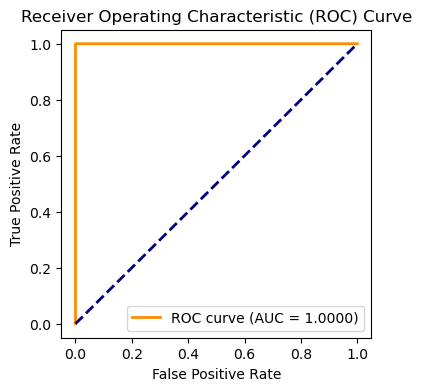

In [48]:
y_prob = rfc.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC Area under the curve is: ",roc_auc)
# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

####  ROC-AUC curve suggests that the model is achieving perfect discrimination between the positive and negative classes

In [47]:
# testing model on unseen data
X_test_scaled[3954,:].reshape(1,14)
y_pred=rfr.predict(X_test_scaled[38689,:].reshape(1,14))
print(y_pred)
print(df.iloc[3954,-1:])

[0]
Label    b
Name: 3954, dtype: object


#### The Model is working well on some Random Unseen data 

## Model Selecion 

                 In our Particle Physics Experiment Classification Model we have moderately imbalanced data set and it is   important that we consider both False Positves and False Negatives, We require a balanced metric between precision and recall. Hense we select F1-Score as our evalution metric to comapre the models we have trained. 

In [48]:
#creating dataframe
data = {
        'Algorithms': ["Logistic Regression", "Random Forest"],
        'Test_data_F1-Scores': [LR_CV_mean_accu_test, rfr_CV_mean_F1score_test]
        }

F1_Scores_df = pd.DataFrame(data)
F1_Scores_df.head()

,Algorithms,Test_data_F1-Scores
0,Logistic Regression,0.950948
1,Random Forest,1.000000


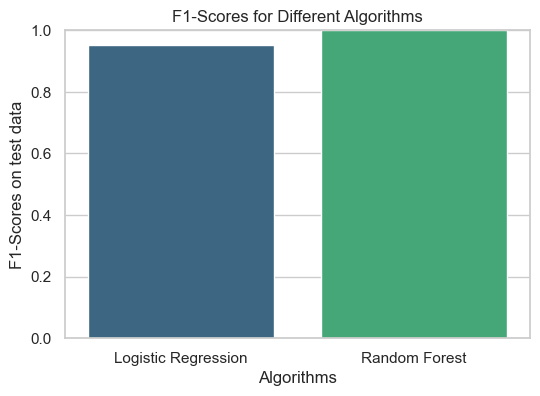

In [49]:
# Plotting Bar Plot to Compare
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=["Logistic Regression", "Random Forest"], y=[LR_CV_mean_accu_test, rfr_CV_mean_F1score_test], data=F1_Scores_df, palette='viridis')
plt.xlabel('Algorithms')
plt.ylabel('F1-Scores on test data')
plt.title('F1-Scores for Different Algorithms')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 for ROC AUC values
plt.show()

# Conclusion

   Both the Random Forest Classifier  and Logistic Regression models appear to perform exceptionally well based on the classification reports for both the training and test data.  However the decision of which model to deploy depends on several factors including interpretability,complexity, scalability, and other and computational considerations.
            
Here are some consideration:
  * If the Computational Cost is not matter of the consideration Then we consider Random Forest Classifier as best model for the experiment as it provides High accuracy, Robustness to data imbalance and over fitting.
  * However if the Computational Cost is the matter of consideration Then we consider Logistic Regression as best model for the experiment as it provides More interpretability and Computational Efficiency 
 
Suggestions to refine our classification models on the Particle Physics Experiment
  * We can Optimize model performance through hyperparameter tuning, specifically for the Random Forest model, Additionally, explore the ensemble methods such as AdaBoost, Gradient Boosting, or XGBoost, leveraging their combined strengths to achieve superior predictive performance.
  * Experiment with deep learning architectures, such as neural networks to capture complex relationships in the data.
            